# Supervised Learning - Classification
    Business Domain: Finance/Banking  -Retail Lending
#### Objective:
To build a model that will help identify the potential customers who have higher probability of purchasing Personal Loan. This will increase the success ratio while at the same time reduce the cost of the X-sell campaign.

##### Variable Description
    ID - Customer ID
    Age -  Customer's age (in years)
    Experience - # years of professional experience
    Income - Annual income of the customer (in 1,000)
    ZIPcode - Home address ZIP code
    Family - Family size of the customer
    CCAvg - Average monthly credit card spending (in 1,000)
    Education - Education level-> 1: undergrad 2: Graduate 3: Advance/Professional
    Mortgage - Value of house mortgage if any (in 1, 000)
    Personal Loan - Did this customer accept the personal loan offered in the last campaign? 1: yes 0: no
    Securities Acct - Does the customer have a securities account with the bank?
    CD Account - Does the customer have a certifcate of deposit (CD) account with the bank?
    Online - Does the customer use internet bank facilities?
    CreditCard - Does the customer use a credit card issued by the Bank?

### Importing the data and understanding structure of dataset

In [4]:
# Importing necessary libraries for the analysis

#Holds multiple graphs on the screen - not need to have plt.show() everytime
%matplotlib inline

# Importing "numpy", "pandas","statistics" and ploting libraries like "matplotlib" and "seaborn"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# imported seperately to plot "qq plots"
import statsmodels.api as sm

In [5]:
# Importing hte data file in python using pandas library
pl = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [6]:
# Top 5 observations from the dataset
pl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# Bottom 5 observations from the dataset
pl.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
# Getting an understanding of the variable type in the dataset
pl.info()

# Observation:
# There are 14 variables including ID and 5000 observations
# All variablees are numeric in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
# Understanding the descriptive stats of the variables
pl.describe().T

# Observation:
# "ID" is a nominal variable and can be dropped
# More than 50% of the population doesnot have "Mortgage" - seperate variable as "Mortgage Flag" can be created
  #tagging customers with "Mortgage"
# Minimum value of "Experience" variable is "-ve" - Need variable treatment
# Variables like: [Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard] will be treated
  #as categorical variables
# Variables like: [Age, Experience, Income, CCAvg, Mortgage] will be treated as continuous variables

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
# Creating a new variable called "Mortgage Flag" which will take value "1" for all customers having Mortgage
  # and "0" for those who donot have Mortgage

pl.loc[(pl["Mortgage"] == 0), "Mortgage Flag"] = 0
pl.loc[(pl["Mortgage"] > 0), "Mortgage Flag"] = 1

# Dropping "ID" column from the dataset
pl = pl.drop("ID", axis= 1)

In [11]:
# Checking the number of unique values across all variables
pl.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Mortgage Flag           2
dtype: int64

In [12]:
# Data treatment - Variable "Experience" is negative which is to be treated
# Calculating he impact on the information loss if we drop the observations having vegative "Experience"

t1 = pl.sum().round().to_frame()
t2 = pl[(pl["Experience"] >= 0) & ((pl["Age"] - pl["Experience"]) > 23)].sum().round().to_frame()

tt = t2 - t1;
sss = (tt/t1)*100
print(sss)

# Inference:
# Maximum of 1% loss in the information with no Loss in the customers with "Personal Loan = 1"
# Observations with negative "Experience" can be dropped

                           0
Age                -0.562437
Experience          0.074610
Income             -0.985982
ZIP Code           -1.040988
Family             -1.243532
CCAvg              -1.145511
Education          -1.148325
Mortgage           -0.802495
Personal Loan       0.000000
Securities Account -1.149425
CD Account          0.000000
Online             -1.005362
CreditCard         -1.020408
Mortgage Flag      -0.780234


In [13]:
# Creating a new subset -"pl_new" with only +ve "Experience" observations
# Going forward, "pl_new" will be our main dataset to analyse
pl_new = pl[(pl["Experience"] >= 0) & ((pl["Age"] - pl["Experience"]) > 23)]
pl_new.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage Flag
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.0


In [14]:
# Checking the variable statistics of the new dataset
pl_new.describe().T

# Observations:
# Count of observations have dropped by "52" to "4948" observations
# "Experience" variable is treated. It have its min. value as "0"
# "ID" variable has been dropped and "Mortgage Flag" variable is created

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.0,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0


In [15]:
# Dividing the dataset into two: "pl_c" - with Categorical variables, "pl_n" - with numerical variables 
pl_c = pl_new.loc[:,["Age","Experience","ZIP Code","Family","Personal Loan",
                 "Securities Account","CD Account","Online","Education","CreditCard","Mortgage Flag"]]

pl_n = pl_new.loc[:,["Income", "CCAvg","Mortgage"]]

pl_c.head()

,Age,Experience,ZIP Code,Family,Personal Loan,Securities Account,CD Account,Online,Education,CreditCard,Mortgage Flag
0,25,1,91107,4,0,1,0,0,1,0,0.0
1,45,19,90089,3,0,1,0,0,1,0,0.0
2,39,15,94720,1,0,0,0,0,1,0,0.0
3,35,9,94112,1,0,0,0,0,2,0,0.0
4,35,8,91330,4,0,0,0,0,2,1,0.0


### Categorical Variables - Explainatory Statsitical Analysis

In [16]:
# Understanding the unique values of the categorical variables
for i in pl_c.columns:
    print("Unique value of",i,"is",pl_new[i].unique())

Unique value of Age is [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63]
Unique value of Experience is [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]
Unique value of ZIP Code is [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710 90277 93106
 94920 91741 95054 95010 94305 91604 94015 90095 91320 95521 95064 90064
 94539 94104 94117 94801 94035 92647 95814 94114 94115 92672 94122 90019
 95616 94065 95014 91380 95747 92373 92093 94005 90245 95819 94022 90404
 93407 94523 90024 91360 95670 95123 90045 91335 93907 92007 94606 94611
 94901 92220 93305 95134 94612 92507 91730 94501 94105 94550 92612 95617
 92374 94080 94608 93555 93311 94704 92717 92037 95136 94542 94143 91775
 92703 92354 92024 92831 92833 94304 90057 92130 91301 92096 92646 92182
 92131 93720 90840 95035 93010 94928 95831 91770 90007 94102 9142

['Age', 'Experience', 'ZIP Code', 'Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'Education', 'CreditCard', 'Mortgage Flag']


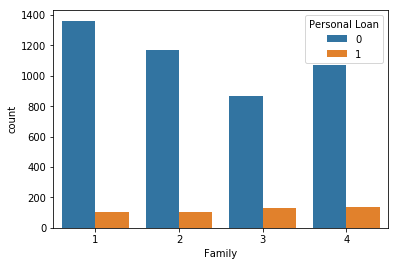

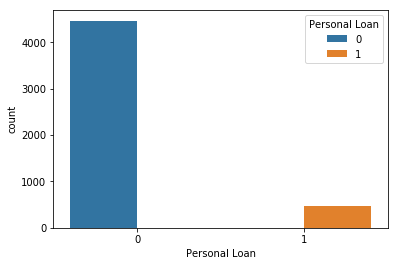

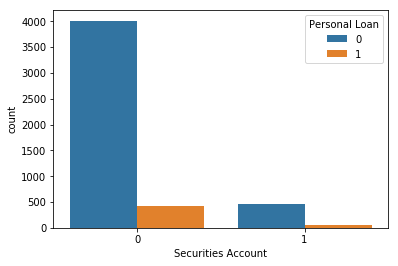

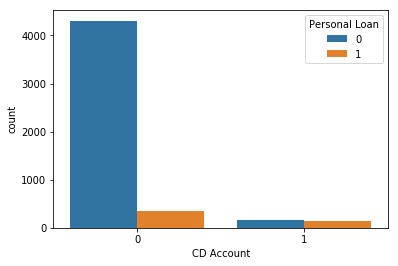

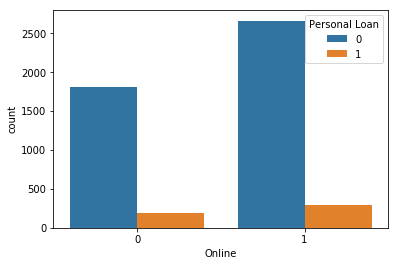

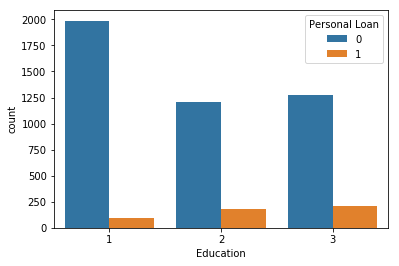

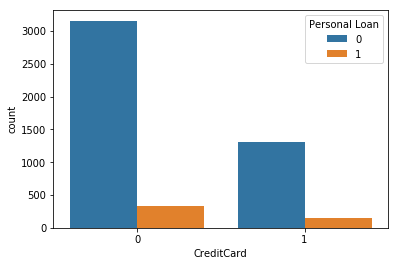

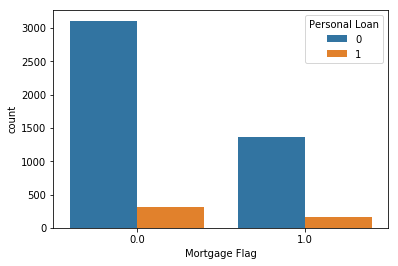

In [17]:
# 2x2 Frequency plot of categorical variables vs "Personal Loan" 

t = list(pl_c.columns);
print(t)
t.remove("ZIP Code")
t.remove("Age")
t.remove("Experience")

for i in t:
    sns.countplot(x = i, data=pl_new, hue = "Personal Loan")
    plt.show()
    
# Observations:
# "Personal Loan" customers seems higher as we move towards larger families
# "CD Account" holders have high "Personal Loan" penetration
# More educated people tend to by "Personal Loan"

# Further Check:
# Perform Chi2 test of these variables to understand the significane of with "Personal Loan" 

In [18]:
# Performing Chi2 test between the independent categorical variables and "Personal Loan" 
t = list(pl_c.columns);

t.remove("ZIP Code")
t.remove("Age")
t.remove("Experience")
t.remove("Personal Loan")
print(t)

import scipy

for i in t:
    TT = pd.crosstab(pl[i],pl["Personal Loan"])
    
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(TT)
    if p <= 0.05:
        print(i,"and Personal Loan are corelated")
        
# Inference:
# "Family", "CD Account", "Education" and "Mortgage Flag" are significantly co-related with the "Personal Loan"

['Family', 'Securities Account', 'CD Account', 'Online', 'Education', 'CreditCard', 'Mortgage Flag']
Family and Personal Loan are corelated
CD Account and Personal Loan are corelated
Education and Personal Loan are corelated
Mortgage Flag and Personal Loan are corelated


['Age', 'Experience', 'ZIP Code', 'Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'Education', 'CreditCard', 'Mortgage Flag']


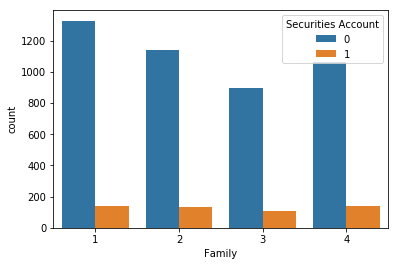

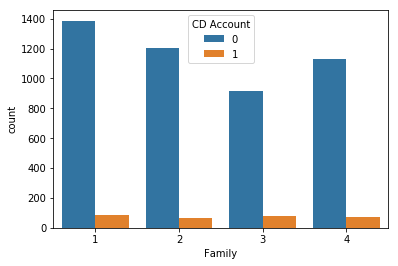

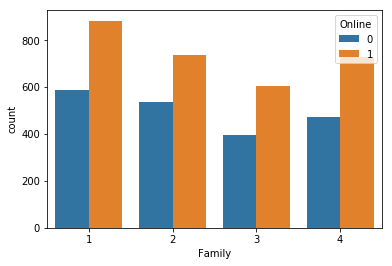

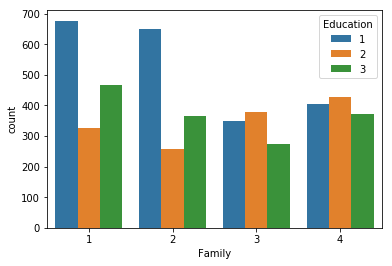

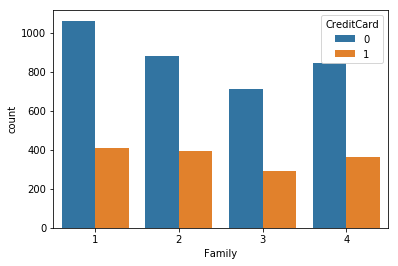

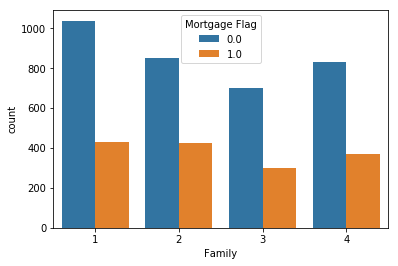

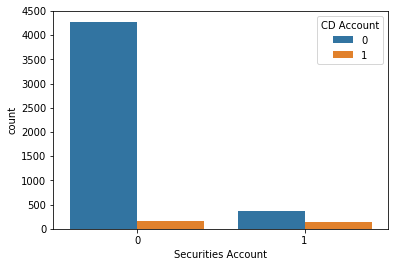

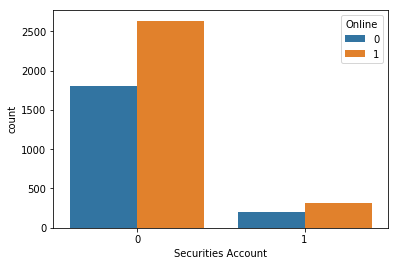

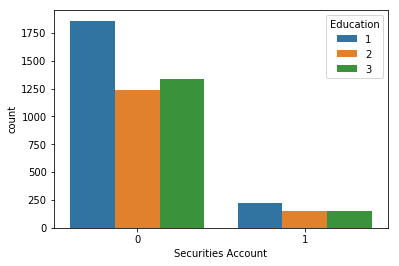

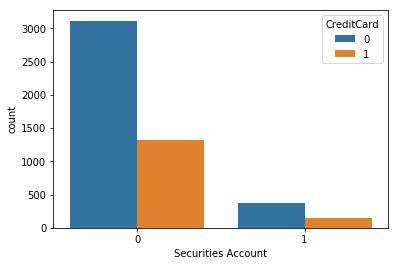

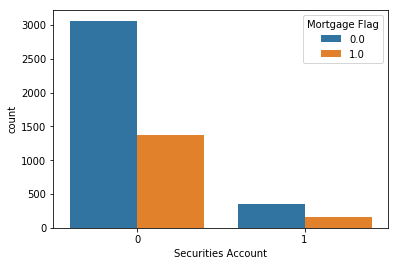

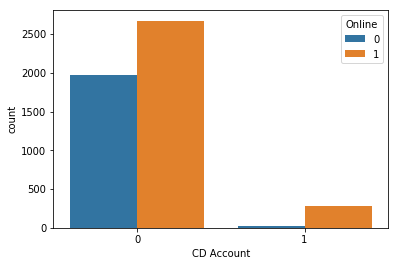

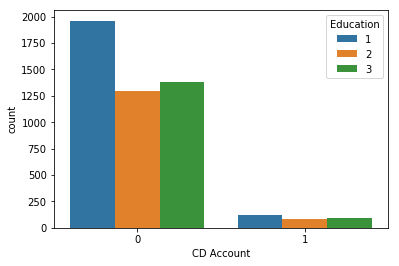

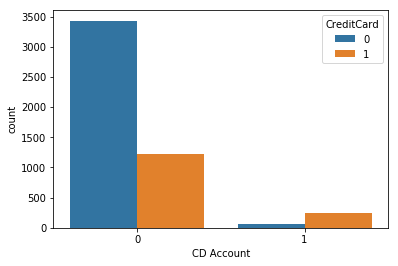

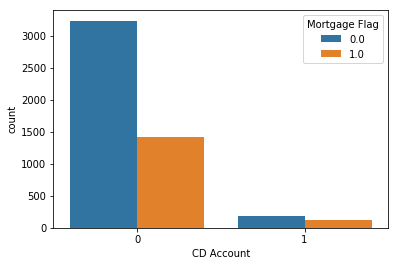

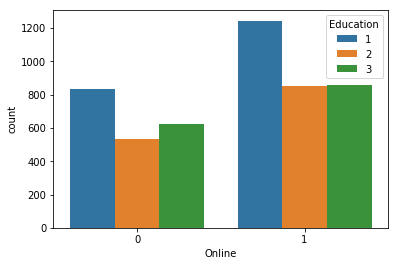

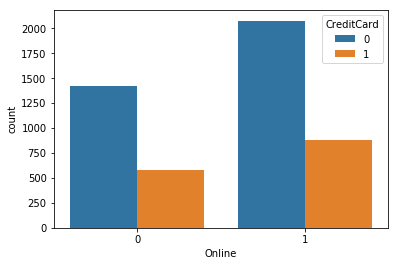

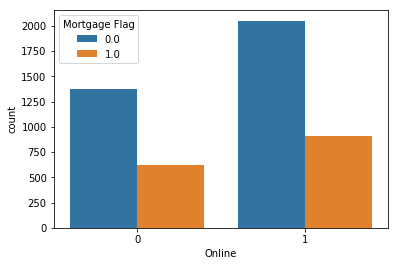

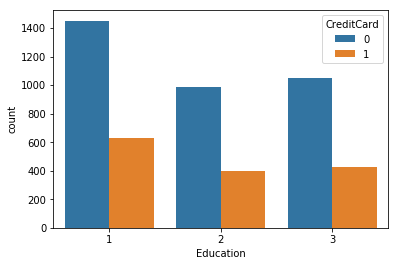

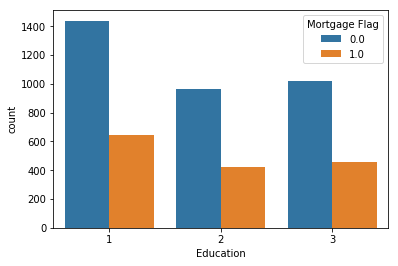

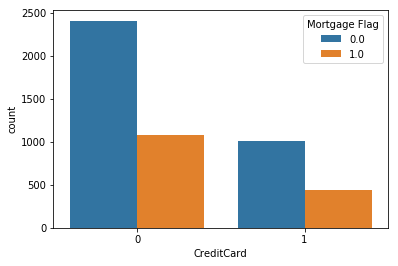

In [19]:
#Frequency plots among Dependent Variables to look for co-relation amoung them

t = list(pl_c.columns);
print(t)
t.remove("ZIP Code")
t.remove("Age")
t.remove("Experience")
t.remove("Personal Loan")

import itertools

A = list(itertools.combinations(t,2))

for (p,q) in A:
    sns.countplot(x = p, data=pl_new, hue = q)
    plt.show()

# Observation:
# Online active customers have CD accounts
# Online active customers have Securities accounts
# CD account is prefered by higher "Educated" customers


# Further Check:
# Perform Chi2 test of these variables to understand the significance among each other 

In [20]:
# Performing Chi2 test of Independence on the all possible pairs

t = list(pl_c.columns);
t.remove("ZIP Code")
t.remove("Age")
t.remove("Experience")
t.remove("Personal Loan")
print(t)

import itertools
A = list(itertools.combinations(t,2))

import scipy
for (e,q) in A:
    TT = pd.crosstab(pl_new[e],pl_new[q])
    
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(TT)
    if p <= 0.05:
        print(e,"and",q,"are corelated")
        
#Inference:
# "Family" is co-related with Education and "CD Account" and "Education"
# CD Account is co-related with "Mortgage Flag", "Credit Card", "Online" and "Securities Account"

['Family', 'Securities Account', 'CD Account', 'Online', 'Education', 'CreditCard', 'Mortgage Flag']
Family and CD Account are corelated
Family and Education are corelated
Securities Account and CD Account are corelated
CD Account and Online are corelated
CD Account and CreditCard are corelated
CD Account and Mortgage Flag are corelated


### Continuous Variables - Explainatory Statsitical Analysis

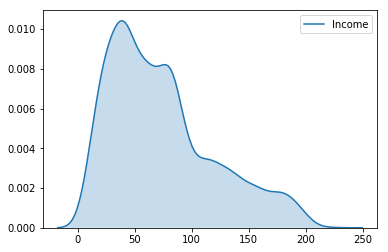

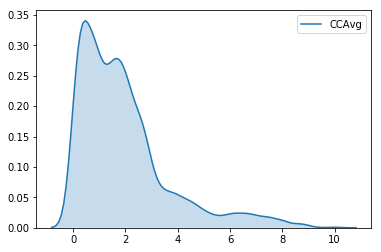

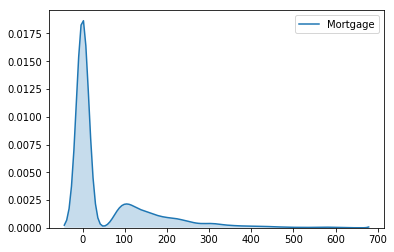

In [21]:
# Understanding the kernal density estimator plots to understand the population view from the provided sample 

for i in pl_n.columns:
    sns.kdeplot(pl_new[i], shade= True)
    plt.show()

# Observation:
# All the 3 variables, "Income", "CCAvg" and "Mortgage" are right skewed and doesnot follow normal distribution

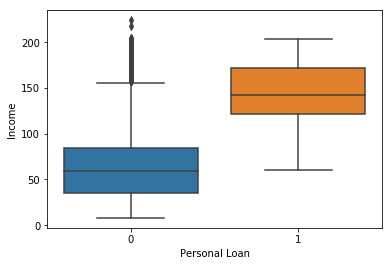

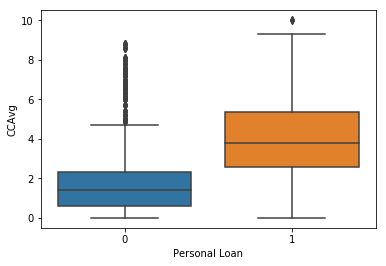

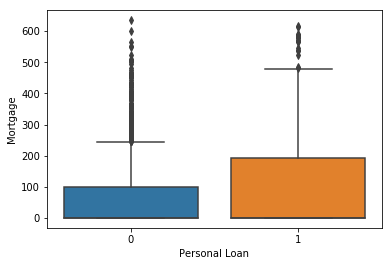

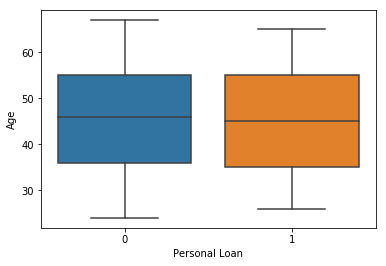

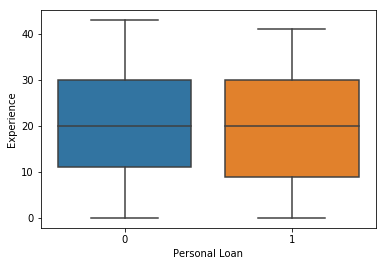

In [22]:
# Performing univariates of continuous variables across "Personal Loan"

t = list(pl_n.columns)
t.append("Age")
t.append("Experience")

for i in t:
    sns.boxplot(x = "Personal Loan", y = i,data = pl_new)
    plt.show()

# Observations:
# High income customers prefer "Pesonal Loan"
# Average Credit Card spends ("CCAvg") is higher in customers with "Personal Loans"
# "Personal Loan" customers also have a high "Mortgage" value

# Further Checks:
# Perform Kruskal- Wallis Test on these variables to check significance
# t-test cannot be performed on these variables as they are "not normally distribured" & and have "different variance"

In [23]:
# Peforming Kruskal- Wallis Test:

m1 = len(pl_new[pl_new["Personal Loan"] == 0])
m2 = len(pl_new[pl_new["Personal Loan"] == 1])
min(m1,m2)

from scipy.stats import mstats
from random import sample

t = list(pl_n.columns)
t.append("Age")
t.append("Experience")

for i in t:
    s1 = sample(list(pl_new[pl_new["Personal Loan"] == 0][i]),min(m1,m2))
    s2 = sample(list(pl_new[pl_new["Personal Loan"] == 1][i]),min(m1,m2))
    
    H, pval = mstats.kruskalwallis(s1,s2)

    print("H-statistic of",i, "is:", H)
    print("P-Value of",i, "is:", pval)

    if pval < 0.05:
        print("Reject NULL hypothesis - Significant differences in",i,"for PL & non-PL customers \n")
    if pval > 0.05:
        print("Accept NULL hypothesis - No significant difference in",i,"for PL & non-PL customers \n")
    
# Inference:
# There is a significant difference in the "Income", "Mortgage" and "CCAvg" values among the Personal Loan customers

H-statistic of Income is: 533.7682844552428
P-Value of Income is: 4.277042240310057e-118
Reject NULL hypothesis - Significant differences in Income for PL & non-PL customers 

H-statistic of CCAvg is: 271.8167771441076
P-Value of CCAvg is: 4.559901053072307e-61
Reject NULL hypothesis - Significant differences in CCAvg for PL & non-PL customers 

H-statistic of Mortgage is: 12.13631396365861
P-Value of Mortgage is: 0.0004944941577708523
Reject NULL hypothesis - Significant differences in Mortgage for PL & non-PL customers 

H-statistic of Age is: 0.4969224897839589
P-Value of Age is: 0.48085548360336905
Accept NULL hypothesis - No significant difference in Age for PL & non-PL customers 

H-statistic of Experience is: 2.0971881098711798
P-Value of Experience is: 0.14757030783473057
Accept NULL hypothesis - No significant difference in Experience for PL & non-PL customers 



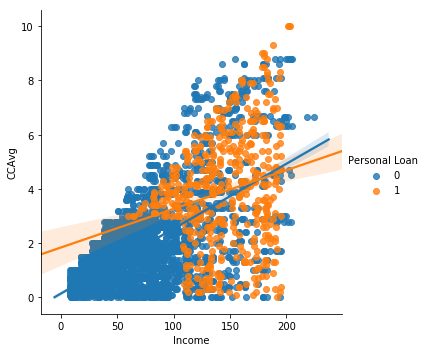

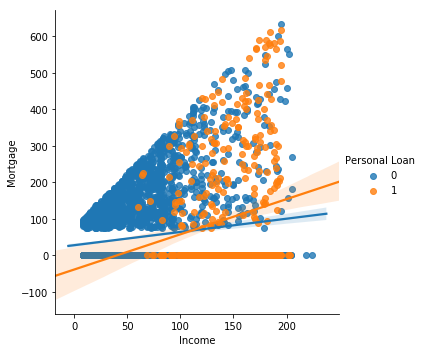

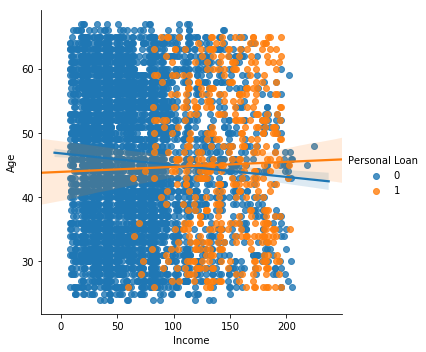

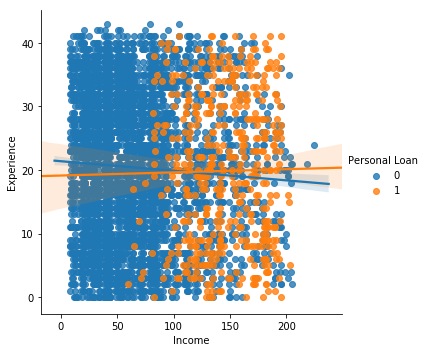

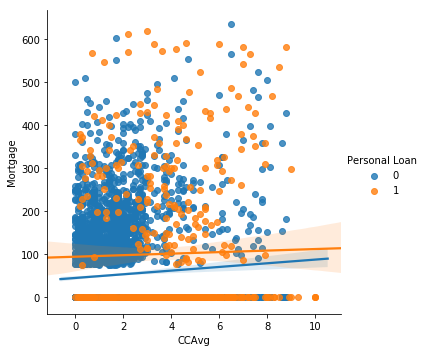

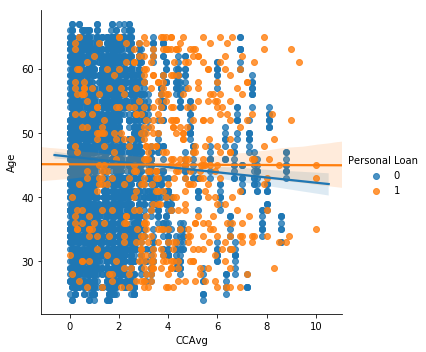

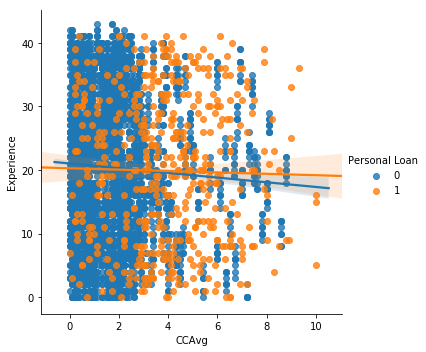

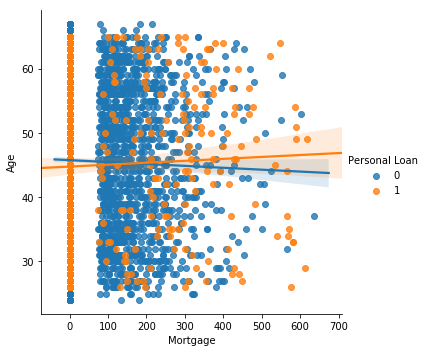

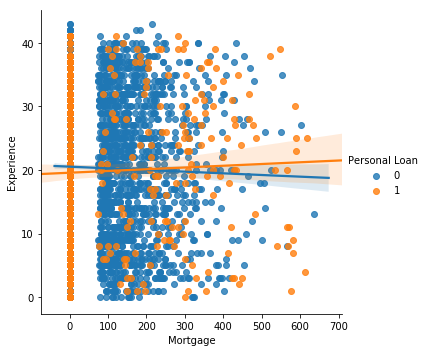

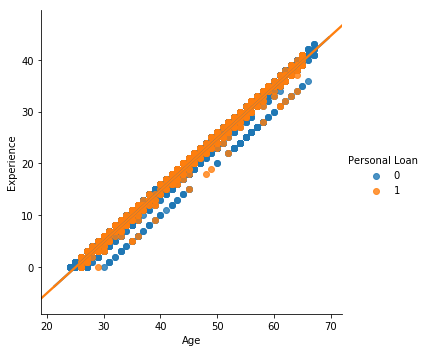

In [24]:
# Scatter plot between continuous varialbes

import itertools

t = list(pl_n.columns)
t.append("Age")
t.append("Experience")

A = list(itertools.combinations(t,2))

for (x,y) in A:
    sns.lmplot(x,y,data=pl_new, hue= "Personal Loan")

# Observations:
# High co-relation between "Age" and "Experience"
# A decent co-relation between "Income" and "Mortgage" & "Income" and "CCAvg" 

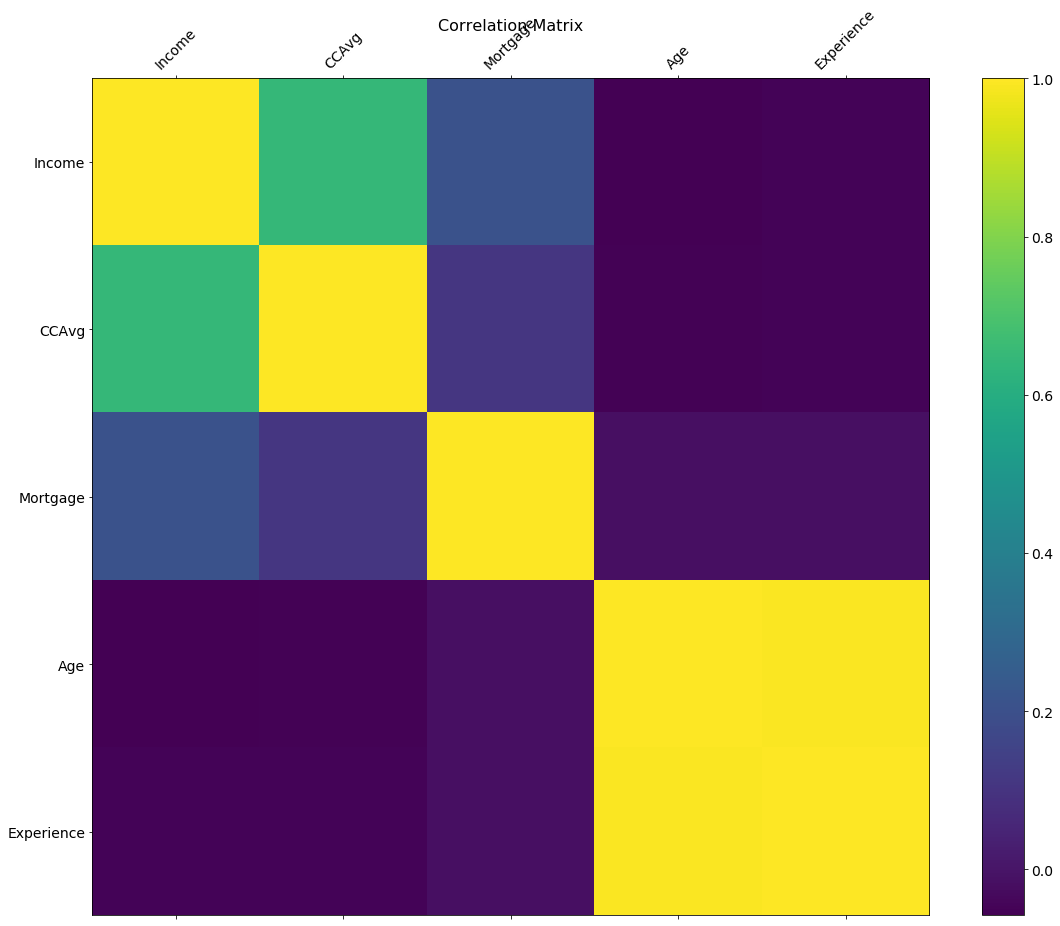

In [25]:
# Genetating Co-relation Matrix between the variables:

df = pl_new.loc[:,t];

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Inference:
# "Age" and "Experience" is correlated
# "CCAvg" and "Income" are correlated

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


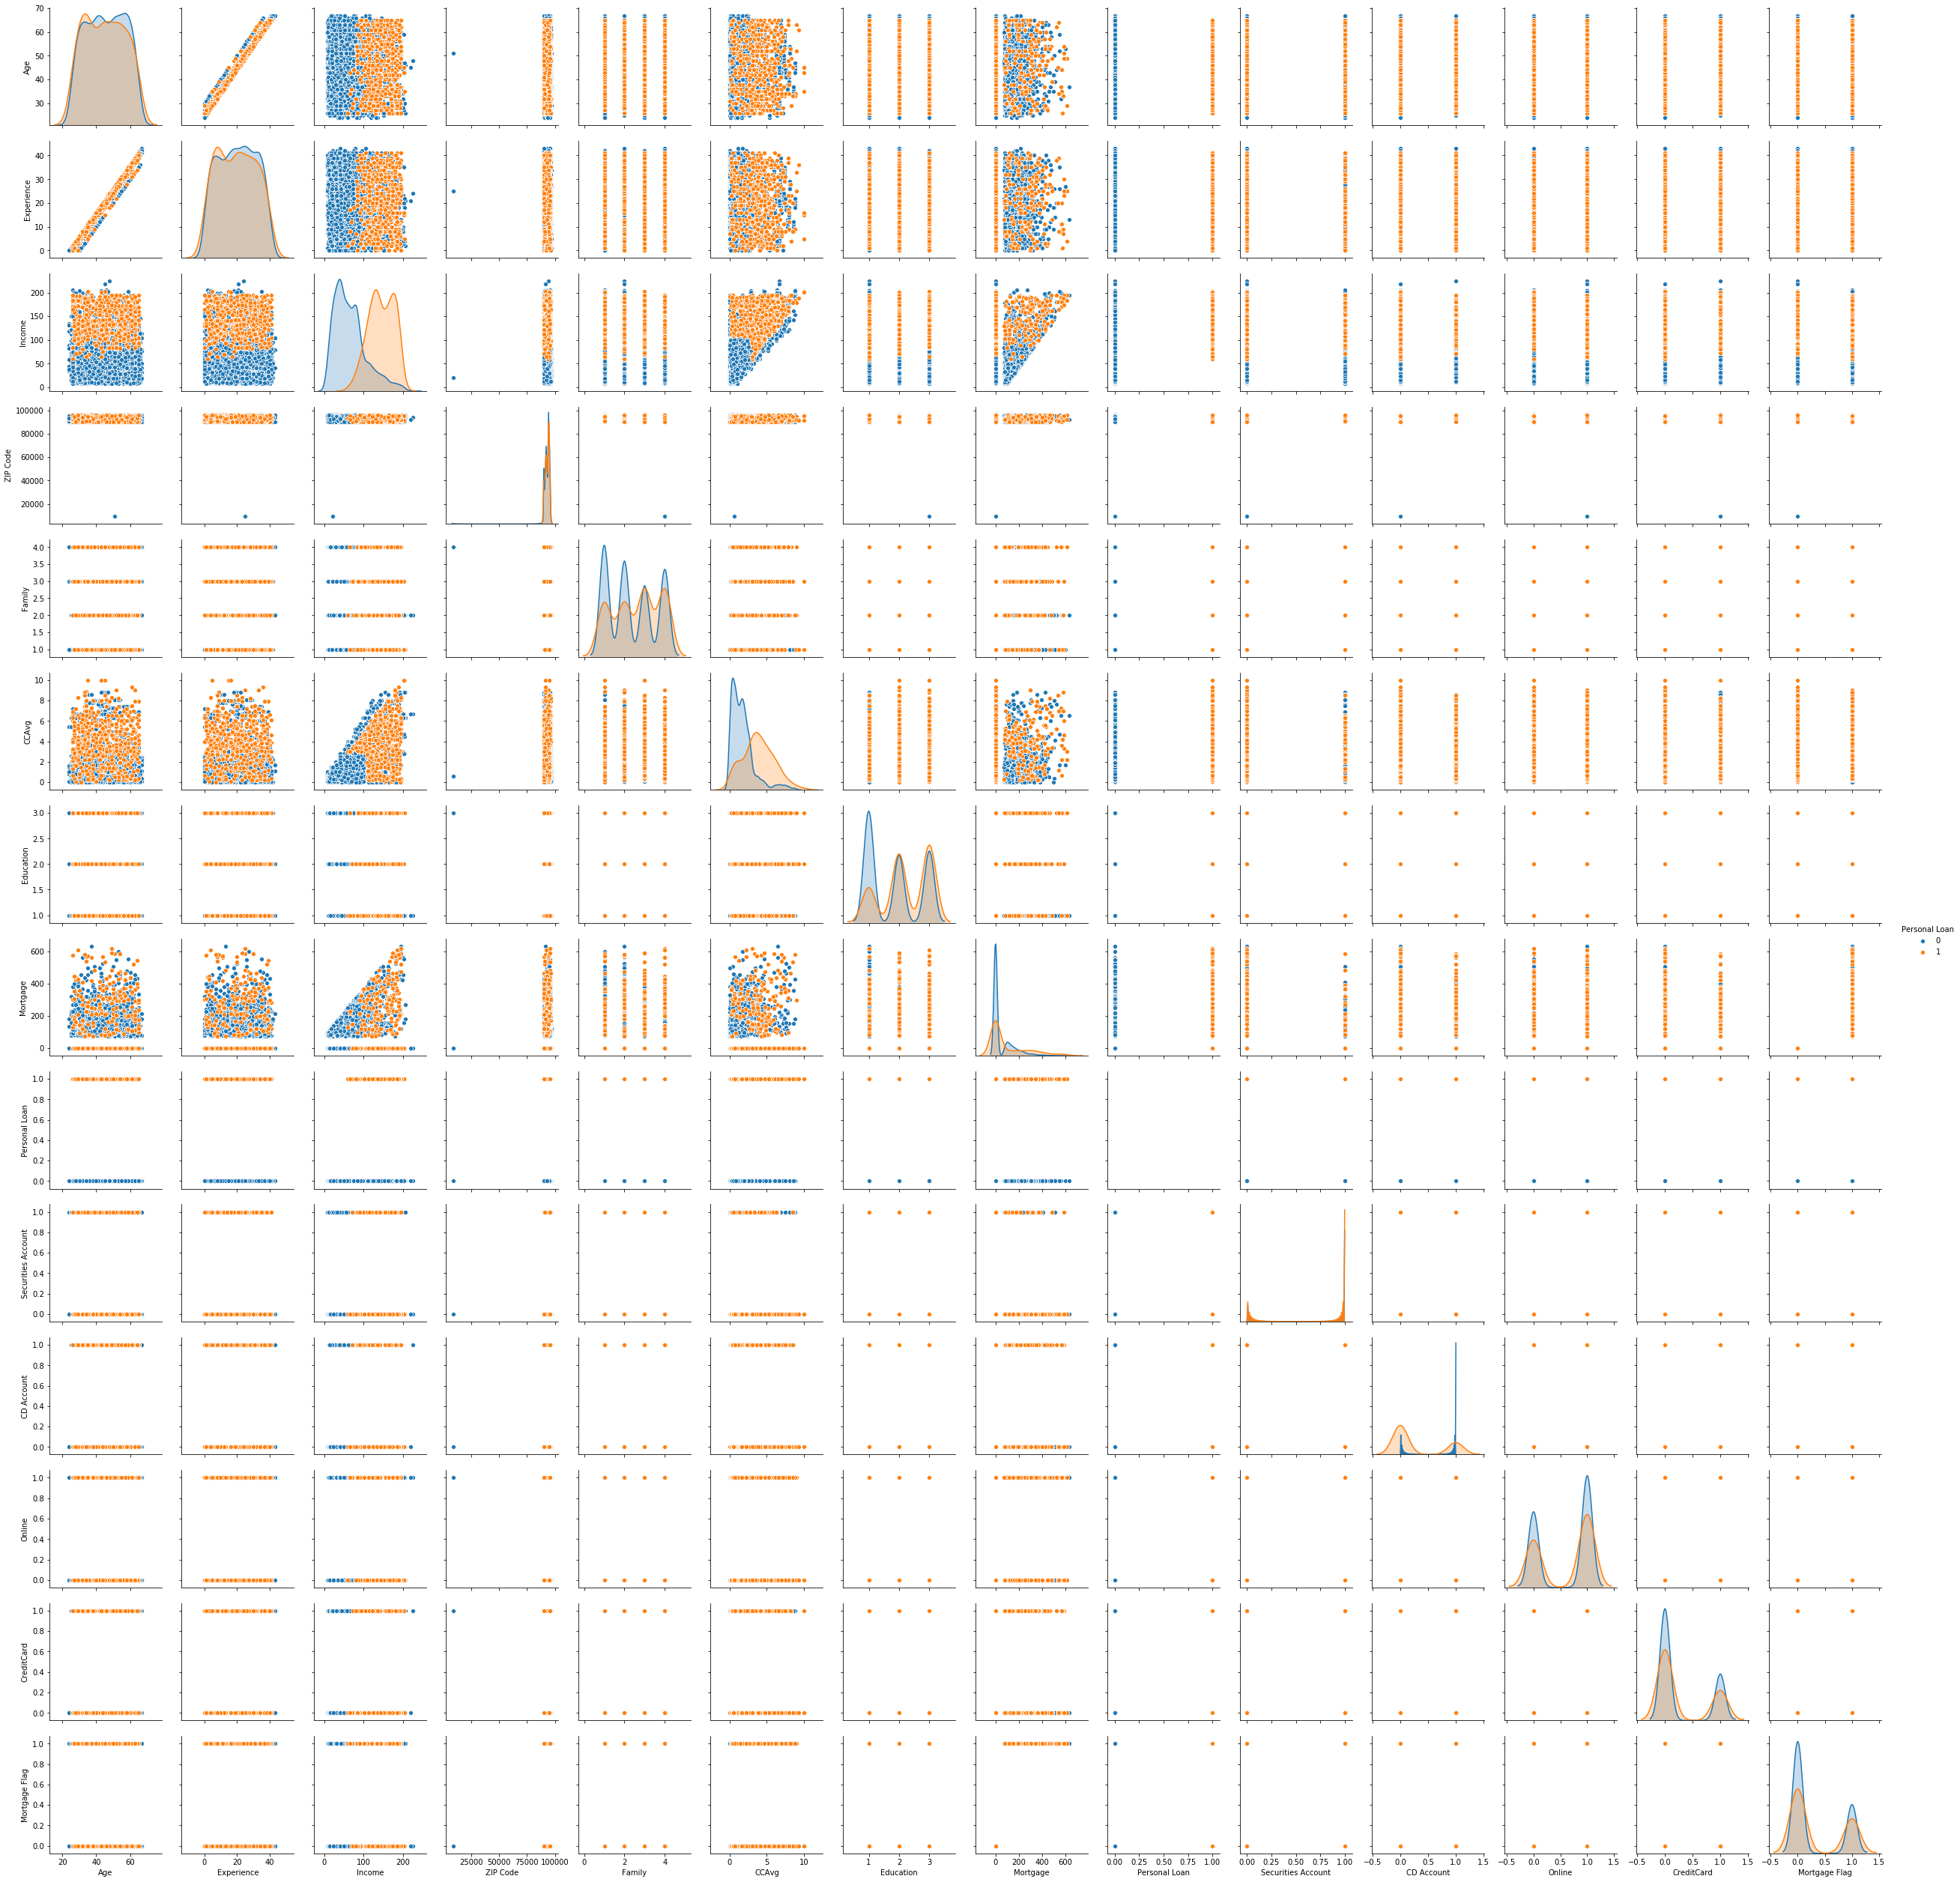

In [26]:
# Bivariate Nalysis using pair Plot

sns.pairplot(pl_new, hue = "Personal Loan")

In [27]:
# Basis above observations and Inferences, we are going to drop following columns:
# Columns droped:
#  "Experience", "Mortgage Flag", "Online", "Securities Account", "ZIP Code"

pl_t = pl_new.drop(["Experience","Mortgage Flag","Online","Securities Account", "ZIP Code"], axis = 1)
pl_t.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.0,46.0,55.0,67.0
Income,4948.0,73.814470,46.112596,8.0,39.0,64.0,98.0,224.0
Family,4948.0,2.391471,1.148444,1.0,1.0,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.7,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.0,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.0,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.0,0.0,0.0,1.0
CD Account,4948.0,0.061035,0.239418,0.0,0.0,0.0,0.0,1.0
CreditCard,4948.0,0.294058,0.455664,0.0,0.0,0.0,1.0,1.0


In [28]:
# Splitting the dataset into "test" and "train" (70:30 - train:test)

from sklearn.model_selection import train_test_split
from sklearn import metrics

temp = list(pl_t.columns)
temp.remove("Personal Loan")
print(temp)

X = pl_t.loc[:,temp];
Y = pl_t.loc[:,"Personal Loan"];

test_size = 0.30;
seed = 1;

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'CreditCard']
(3463, 8)
(1485, 8)
(3463,)
(1485,)


### Implementation of Supervised Models

#### Logistic Regression:

In [29]:
from sklearn.linear_model import LogisticRegression

# Calling the LogicticRegression object adn storing it into "model"
model = LogisticRegression()

# Fiting out dataset into the model
# By default regularized by L2
model.fit(X_train, y_train)

# Predicting the y variable using hte model fit and "x_test"
y_predict = model.predict(X_test)

#Measuring the model score/accuracy
model_score = model.score(X_test, y_test)
print(model_score)

#Looking at other attributes of the model accuracy like recall and f1-score
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observation:
#  The model accuracy is 94.8% on the test dataset
#  But, Recall is only 58% i.e. we correctly predicted only 58% of the population with Personal Loans
#  F1-Score is 0.69

0.9481481481481482
[[1324   16]
 [  61   84]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.84      0.58      0.69       145

   micro avg       0.95      0.95      0.95      1485
   macro avg       0.90      0.78      0.83      1485
weighted avg       0.94      0.95      0.94      1485



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Naive Bayes Classifier:

In [30]:
from sklearn.naive_bayes import GaussianNB

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

# Scoring he model on the training dataset
print("Train model accuracy:",model.score(X_train, y_train))

# Predicting the Classes using the built model and the test features
y_pred = model.predict(X_test)

#Measuring the model score/accuracy
model_score = model.score(X_test, y_test)
print("Test model accuracy:",model_score)

# ALso looking at the confusion matrix and sensitivity of the model

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Observation:
#  The model accuracy on the test dataset is 87.7%
#  Recall of the model is 57% which means out of the all Actual Personal Loan holders, we could predict 57% accurately
#  Precision is also 41% which means of all Predicted Personal Loans, 41% are correct
# The F1-score is 0.48

Train model accuracy: 0.8868033496967946
Test model accuracy: 0.8774410774410775
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1340
           1       0.41      0.57      0.48       145

   micro avg       0.88      0.88      0.88      1485
   macro avg       0.68      0.74      0.70      1485
weighted avg       0.90      0.88      0.89      1485

[[1220  120]
 [  62   83]]


#### k-NN Nearest Neighbour Classifier:

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy_score = []

for i in range(1,20,1):

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set  
    model = KNeighborsClassifier(n_neighbors= i, weights = 'distance')
    model.fit(X_train, y_train)
    
# Predicting the Classes using the built model and the test features
    y_pred = model.predict(X_test)
    
#Measuring the model score/accuracy
    print(i,(model.score(X_test, y_test)))

# Re-running the model with the optemized k:"k=11"
model = KNeighborsClassifier(n_neighbors= 11, weights = 'distance')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ALso looking at the confusion matrix and sensitivity of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# Observations:
# Accuracy of k-NN Classifier is 91.2%
# Recall of the model is just 32% i.e. only 32% of the actual Personal loans were correctly predicted
# Precision is also 59%, i.e. Of the predicted "Personal Loan", 59% were correctly predicted

1 0.901010101010101
2 0.901010101010101
3 0.9097643097643098
4 0.9097643097643098
5 0.9063973063973064
6 0.9097643097643098
7 0.9117845117845118
8 0.9111111111111111
9 0.9104377104377105
10 0.9111111111111111
11 0.9124579124579124
12 0.9104377104377105
13 0.9090909090909091
14 0.907070707070707
15 0.9117845117845118
16 0.9124579124579124
17 0.9111111111111111
18 0.9117845117845118
19 0.9104377104377105
[[1308   32]
 [  98   47]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1340
           1       0.59      0.32      0.42       145

   micro avg       0.91      0.91      0.91      1485
   macro avg       0.76      0.65      0.69      1485
weighted avg       0.90      0.91      0.90      1485



#### Gradient Boosting Classifier:

In [32]:
# Gradient Boosting Classifier using Entropy criteria

from sklearn.ensemble import GradientBoostingClassifier

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set  
GBC = GradientBoostingClassifier(n_estimators = 50)
GBC.fit(X_train,y_train)

# Predicting the Classes using the built model and the test features
y_predict = GBC.predict(X_test)

#Measuring the model score/accuracy
print(GBC.score(X_train , y_train))
print(GBC.score(X_test , y_test))

# ALso looking at the confusion matrix and sensitivity of the model
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observations:
# The Model accuracy is 98.4%, highest amoung all the above ones
# Recall is 87%, i.e. we have correctly predicted 87% of the Personal Loan customers
# Preision is 97%, i.e. of all the predicted Persoanl Loans, 97% were correctly predicted

0.991336991048224
0.9845117845117846
[[1336    4]
 [  19  126]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1340
           1       0.97      0.87      0.92       145

   micro avg       0.98      0.98      0.98      1485
   macro avg       0.98      0.93      0.95      1485
weighted avg       0.98      0.98      0.98      1485



# Conclusion:
We have tried applying 4 different Supervisel Learning Classifiers, and below are their Overall Accuracy, Recall and F1-Score
   
    Logistic Regression:
    Accuracy: 94.8%
    Recall: 58%
    F1-Score: 0.69
    
    Naive Bayes Classifier:
    Accuracy: 87.7%
    Recall: 57%
    F1-Score: 0.48

    k-NN Classifier:
    Accuracy: 91.3%
    Recall: 32%
    F1-Score: 0.42
    
    Gradient Boosting Classifier:
    Accuracy: 98.4%
    Recall: 87%
    F1-Score: 0.92
    
The dependent variable i.e. Personal Loans  penetration on the given sample was just 9.6%. The sample was biased towards the Non-Persoanl Loan observations due to which models like k-NN Classifier, even with 91% accuracy, had only 32% of the recall value. Similarly, due to the same reason, Naive Bayes Classifier had a lot of "False-Positive", bringing its Precision to 41%. Logistic Regression, performed better than both k-NN Classifier and Naive Bayes Classifier with 58% Recall and 0.69 F1-score.

Gradient Boosting Classifier performed the best as it doesnot have a dependency on the distribution of the dependent variable as it tries to maximize the information gain through the given independent variables